# 다중회귀

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv')
#넘파이로 바꿔줌
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

# 다항 특성 만들기

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#기본값 degree 2
poly = PolynomialFeatures()
#입력
poly.fit([[2, 3]])
#1(bias), 2,3,2**2,2*3,3**2
#결과를 확인
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)#1빼주기 위해 False 지정
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [7]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [9]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [10]:
print(train_poly.shape)
#42개 행, 9개 특성있는 배열

(42, 9)


In [11]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
#x0은 첫번째 특성, x1은 두번째 특성, x2는 세번재 특성 나머지는 변환한 값들

In [13]:
test_poly = poly.transform(test_input)

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)#타겟은 변환하지 않음
print(lr.score(train_poly, train_target))  #훈련 점수 

0.9903183436982124


In [15]:
print(lr.score(test_poly, test_target)) #테스트 점수 (과소 적합은 사라짐)

0.97145599115942


In [16]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree 2 에서 5로 증가

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [17]:
print(train_poly.shape) #특성 개수 55개로 늘어남

(42, 55)


poly.get_feature_names()

In [18]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999997522


In [19]:
print(lr.score(test_poly, test_target)) #굉장히 안좋게 나옴 , 과대적합 : 특성을 많이 사용해서 이런 결과가 나옴

-144.40564433961768


## 규제

In [20]:
#과대적합 줄일수 있는 방법 , 정규화라고도 함

In [21]:
from sklearn.preprocessing import StandardScaler
# Scale 맞추기 위해 사용

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [25]:
from sklearn.linear_model import Ridge
# L2 규제 (가중치의 제곱 벌칙)
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [26]:
print(ridge.score(test_scaled, test_target)) #테스트 점수 좋아짐

0.9790693977615386


In [27]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [28]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #릿지의 매개변수 , 크게 하면 세짐 기본값은 1
#log 스케일로 하이퍼파라미터 조사하는 것이 관례
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

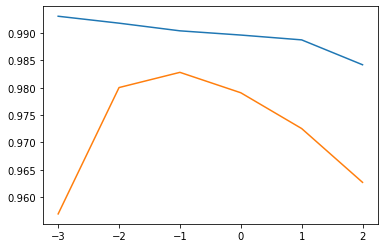

In [31]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()
#왼쪽 과대적합, 오른쪽 과소적합

In [32]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386922


## 라쏘 회귀

In [34]:
from sklearn.linear_model import Lasso
#(가중치의 절대값 벌칙), L1규제와 동일한 값
#일반적으로 릿지를 선호
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [35]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [36]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\users\hyu\anaconda3\envs\moon\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
c:\users\hyu\anaconda3\envs\moon\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


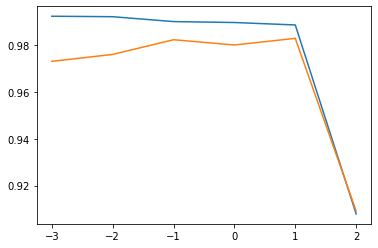

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [38]:
#가장 좋은 값인 10일 때 평가
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [39]:
print(np.sum(lasso.coef_ == 0))
#사용하지 않은 개수
#55개중 15개만 사용함

40
